# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
train_data = pd.read_excel(r'C:\Users\vinay\Projects\P-3_Flight_Prices\Data_Train.xlsx')
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


## Data Cleaning

In [3]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [5]:
train_data.dropna(inplace=True)

In [6]:
Data = train_data.copy()

In [7]:
Data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
Data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
def change_to_datetime(col):
    Data[col] = pd.to_datetime(Data[col])

In [10]:
for feature in ['Dep_Time', 'Arrival_Time','Date_of_Journey']:
    change_to_datetime(feature)

C:\Users\vinay\AppData\Local\Temp\ipykernel_24320\286016830.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data[col] = pd.to_datetime(Data[col])
C:\Users\vinay\AppData\Local\Temp\ipykernel_24320\286016830.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data[col] = pd.to_datetime(Data[col])
C:\Users\vinay\AppData\Local\Temp\ipykernel_24320\286016830.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Data[col] = pd.to_datetime(Data[col])


In [11]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [12]:
Data['Journey_day'] = Data['Date_of_Journey'].dt.day

In [13]:
Data['Journey_month'] = Data['Date_of_Journey'].dt.month

In [14]:
Data['Journey_year'] = Data['Date_of_Journey'].dt.year

In [15]:
Data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-22 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-22 05:50:00,2024-08-22 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-22 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [16]:
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute

In [17]:
extract_hour_min(Data,'Dep_Time')
extract_hour_min(Data,'Arrival_Time')
Data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-22 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-22 05:50:00,2024-08-22 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-22 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [18]:
cols_drop = ["Arrival_Time","Dep_Time"]
Data.drop(cols_drop, axis=1, inplace=True)
Data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30


In [19]:
Data.shape

(10682, 16)

## Data Analysis

In [20]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"



<Axes: xlabel='Dep_Time_hour'>

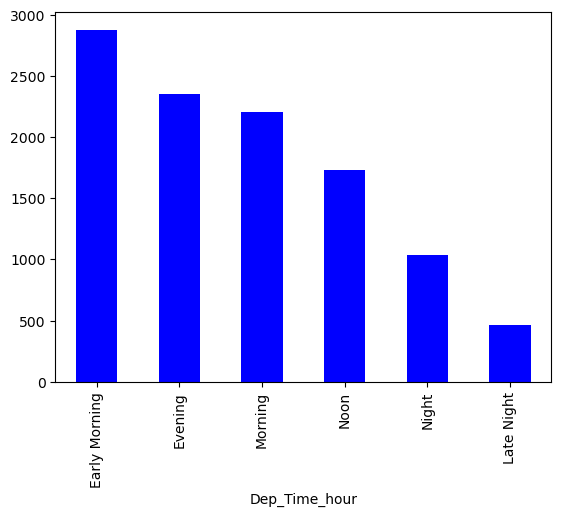

In [21]:
Data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar",color="b")

In [22]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

## Change strings into nums

In [23]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x 

In [24]:
Data['Duration'] = Data['Duration'].apply(preprocess_duration)
Data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [25]:
Data['Duration'][0].split(' ')

['2h', '50m']

In [26]:
Data['Duration'][0].split(' ')[0][0:-1]              #1st zero to get hrs and -1 to remove h from str

'2'

In [27]:
int(Data['Duration'][0].split(' ')[0][0:-1])

2

In [28]:
int(Data['Duration'][0].split(' ')[1][0:-1])

50

In [29]:
Data['Duration_hours'] = Data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [30]:
Data['Duration_mins'] = Data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [31]:
Data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [32]:
Data['Duration_Total_mins'] = Data['Duration'].str.replace('h',"*60").str.replace(' ',"+").str.replace('m',"*1").apply(eval)

In [33]:
Data['Duration_Total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_Total_mins', ylabel='Price'>

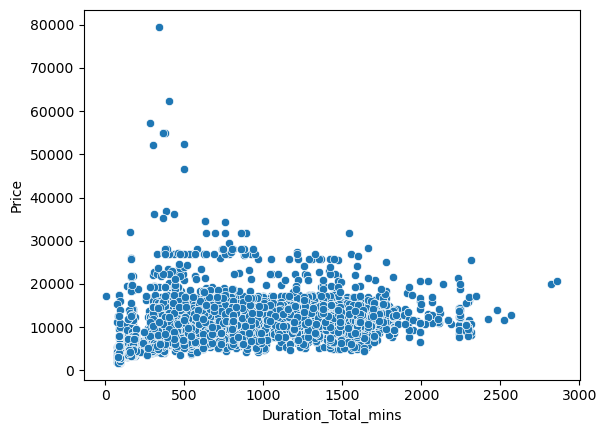

In [34]:
sns.scatterplot(x="Duration_Total_mins",y="Price",data=Data)

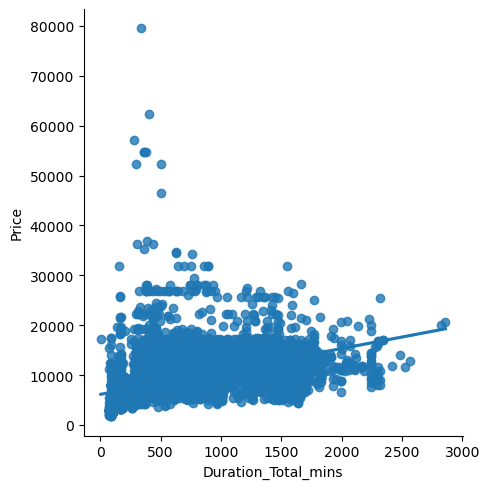

In [35]:
sns.lmplot(x="Duration_Total_mins",y="Price",data=Data)

<Axes: xlabel='Duration_Total_mins', ylabel='Price'>

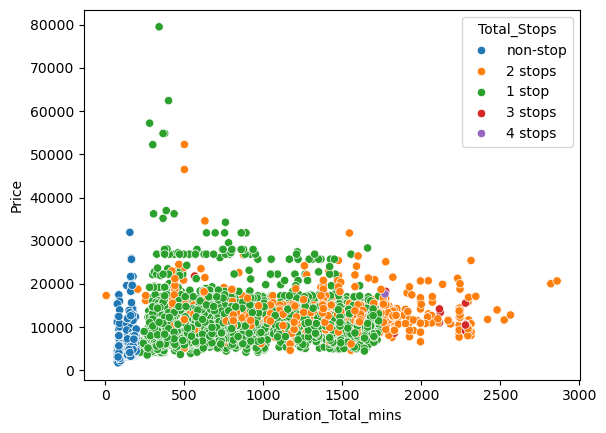

In [36]:
sns.scatterplot(x="Duration_Total_mins",y="Price",hue="Total_Stops",data=Data)

In [37]:
Data[Data['Airline']=='Air India'].groupby('Route').size().sort_values()

Route
BOM → RPR → VTZ → HYD            1
BOM → COK → MAA → HYD            1
BOM → CCU → HYD                  1
BOM → BLR → CCU → BBI → HYD      1
BOM → JDH → JAI → DEL → HYD      1
                              ... 
DEL → COK                       75
DEL → MAA → COK                 77
BOM → HYD                       98
DEL → BOM → COK                117
BLR → DEL                      158
Length: 92, dtype: int64

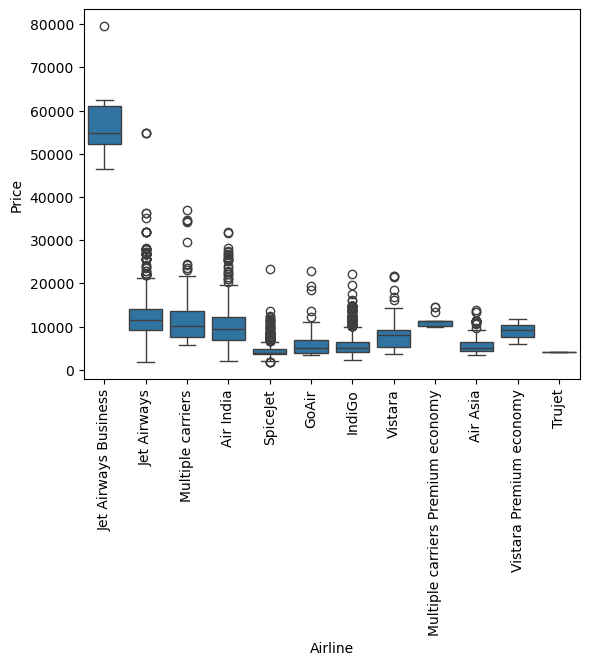

In [38]:
sns.boxplot(x='Airline',y='Price',data=Data.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical")
plt.show()

## Applying One-hot Coding

In [39]:
cat_col = [col for col in Data.columns if Data[col].dtype=="object"]

In [40]:
num_col = [col for col in Data.columns if Data[col].dtype!="object"]
num_col

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins',
 'Duration_Total_mins']

In [41]:
for sub_category in Data['Source'].unique():
    Data['Source_'+sub_category] = Data['Source'].apply(lambda x : 1 if x==sub_category else 0) 

In [42]:
Data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


## Target Guided Coding

In [43]:
Data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [44]:
airlines = Data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [45]:
dict_airlines = {key : index for index,key in enumerate(airlines,1)}
dict_airlines

{'Trujet': 1,
 'SpiceJet': 2,
 'Air Asia': 3,
 'IndiGo': 4,
 'GoAir': 5,
 'Vistara': 6,
 'Vistara Premium economy': 7,
 'Air India': 8,
 'Multiple carriers': 9,
 'Multiple carriers Premium economy': 10,
 'Jet Airways': 11,
 'Jet Airways Business': 12}

In [46]:
Data['Airline'] = Data['Airline'].map(dict_airlines)

In [47]:
Data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [48]:
Data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [49]:
dest = Data.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [50]:
dict_dest = {key : index for index,key in enumerate(dest,1)}
dict_dest

{'Kolkata': 1, 'Hyderabad': 2, 'Delhi': 3, 'Banglore': 4, 'Cochin': 5}

In [51]:
 Data['Destination'] = Data['Destination'].map(dict_dest)

## Perform Label Encoding

In [52]:
Data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,4,2019-03-24,Banglore,3,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,8,2019-05-01,Kolkata,4,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [53]:
Data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [54]:
stops = {'non-stop':3, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [55]:
Data['Total_Stops'] = Data['Total_Stops'].map(stops)

## Remove Unnecessary Features

In [56]:
Data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,4,2019-03-24,Banglore,3,BLR → DEL,2h 50m,3,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,8,2019-05-01,Kolkata,4,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [57]:
Data['Additional_Info'].value_counts()/len(Data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [58]:
Data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_Total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [59]:
Data['Journey_year'].unique()

array([2019])

In [60]:
Data.drop(columns=['Date_of_Journey','Source','Additional_Info','Journey_year','Duration_Total_mins','Route','Duration'],axis=1,inplace=True)

In [61]:
Data.head(1)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,4,3,3,3897,24,3,22,20,1,10,2,50,1,0,0,0,0


## Outlier Detection

In [62]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.histplot(df[col],ax=ax3, kde=False)

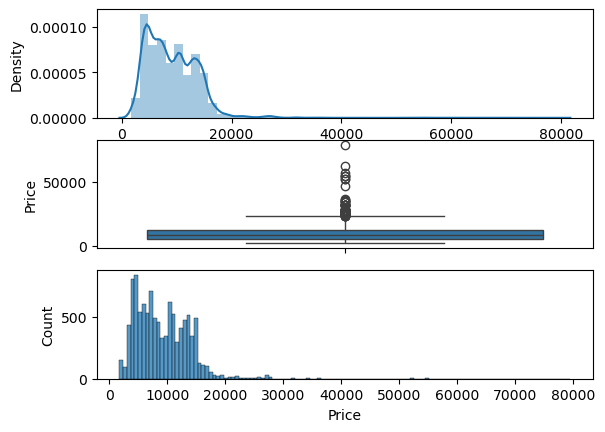

In [63]:
plot(Data, 'Price')

In [64]:
q1 = Data['Price'].quantile(0.25)
q3 = Data['Price'].quantile(0.75)
iqr = q3-q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr
maximum

23017.0

In [65]:
print([price for price in Data['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [66]:
Data['Price'] = np.where(Data['Price']>=35000, Data['Price'].median(), Data['Price'])

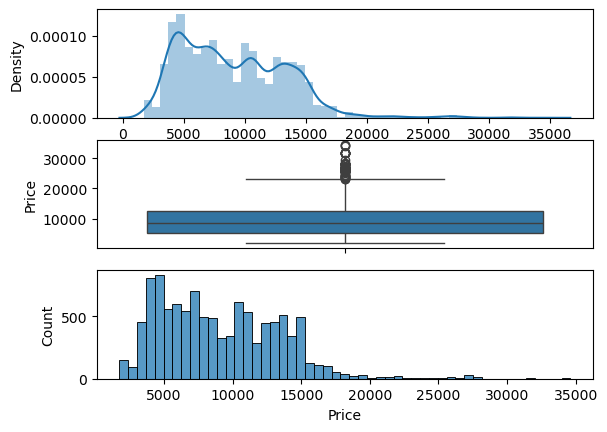

In [67]:
plot(Data, 'Price')

## Feature Selection

In [68]:
X = Data.drop('Price',axis=1)
y = Data['Price']

In [69]:
from sklearn.feature_selection import mutual_info_regression

In [70]:
main = mutual_info_regression(X,y)
main

array([1.31458268, 1.06297288, 0.76715648, 0.37201933, 0.63073887,
       0.92041485, 0.75830313, 1.140583  , 0.89945152, 1.11945208,
       0.67700287, 0.39278283, 0.45222924, 0.53022358, 0.13728663,
       0.20568577])

In [71]:
imp_df = pd.DataFrame(main, index = X.columns)
imp_df.columns = ['Importance']
imp_df.sort_values(by='Importance',ascending=False)

,Importance
Airline,1.314583
Arrival_Time_hour,1.140583
Duration_hours,1.119452
Destination,1.062973
Dep_Time_hour,0.920415
Arrival_Time_minute,0.899452
Total_Stops,0.767156
Dep_Time_minute,0.758303
Duration_mins,0.677003
Journey_month,0.630739


## Implement ML RF model

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf_reg = RandomForestRegressor()

In [76]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
y_pred = rf_reg.predict(X_test)
y_pred

array([16802.9 ,  5315.83,  8789.25, ...,  3474.96,  6341.92,  6860.25])

In [78]:
from sklearn import metrics

In [79]:
metrics.r2_score(y_test,y_pred)

0.8097749638008572

In [80]:
import pickle

In [81]:
file = open('rf_model', 'wb')

In [82]:
pickle.dump(rf_reg, file)

In [83]:
model = open('rf_model', 'rb')

In [84]:
forest = pickle.load(model)

In [85]:
y_pred2 = forest.predict(X_test)
y_pred2

array([16802.9 ,  5315.83,  8789.25, ...,  3474.96,  6341.92,  6860.25])

In [86]:
metrics.r2_score(y_test,y_pred2)

0.8097749638008572

### Evaluation metric

In [91]:
def mape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [92]:
mape(y_test, y_pred)

13.174526975722923

## Automate ML

In [93]:
from sklearn import metrics

In [96]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training Score: {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE : {}'.format(mape(y_test, y_prediction)))
    sns.distplot(y_test - y_prediction)

Training Score: 0.9512288134545198
Predictions are : [16809.13  5376.33  8938.17 ...  3582.54  6306.5   6891.9 ]


r2 score: 0.8102591500079561
MAE : 1176.7274712865133
MSE : 3693798.9078235435
RMSE : 1921.9258330704502
MAPE : 13.184209588854866


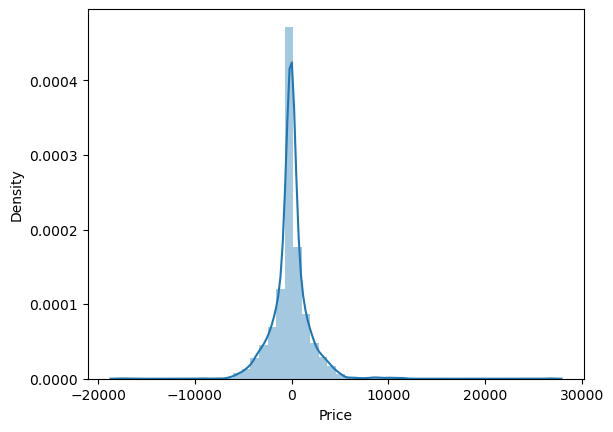

In [97]:
predict(RandomForestRegressor())

In [98]:
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.966591628243878
Predictions are : [16840.  4959.  8085. ...  3419.  5797.  6442.]


r2 score: 0.6756856728719369
MAE : 1410.7877823536753
MSE : 6313621.486292483
RMSE : 2512.6920794821804
MAPE : 15.5762980908104


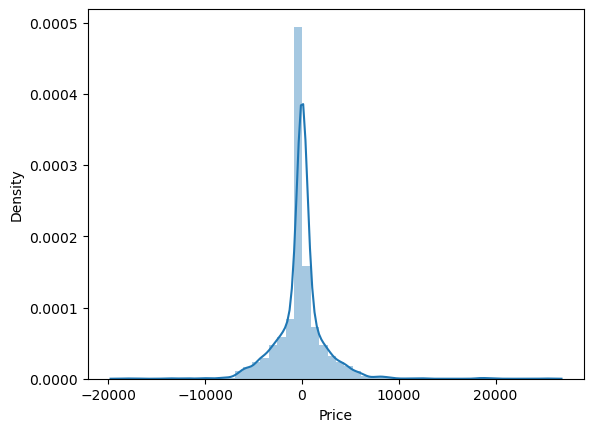

In [99]:
predict(DecisionTreeRegressor())

## Hypertune ML model

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
reg_rf = RandomForestRegressor()

In [104]:
np.linspace(start=100,stop=1200,num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [108]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)] ##no.of DT

max_features = ["auto", "sqrt"]

max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

min_samples_split = [5,10,15,100]

In [109]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}

In [110]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=2, n_jobs=-1, verbose=2)

In [111]:
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [112]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [113]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=980)

In [114]:
rf_random.best_score_

0.788430301075816

In [115]:
y_pred

array([16802.9 ,  5315.83,  8789.25, ...,  3474.96,  6341.92,  6860.25])

In [120]:
metrics.r2_score(y_test,y_pred)

0.8097749638008572